# Validate User Inputs for Python Function

Writing type hints for function argument is a good start, but as the name suggests, it only hints the data type of argument. When the functionality of the code depends on the data type of argument, then we must put validations in place.

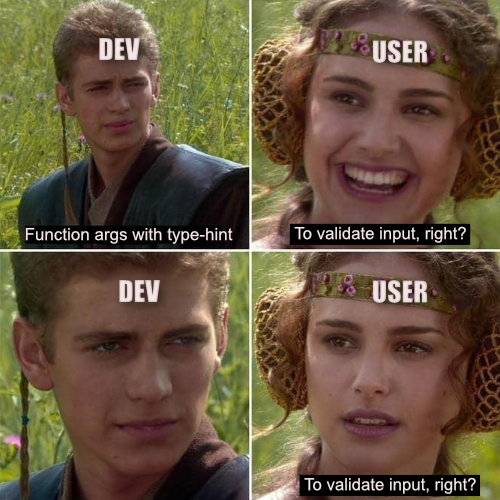

## Introduction:

Type hints are great, they help you to write better code and reduce documentation required for external user or downstream software developers. However, type hints does not validate the input from user. In my opinion, without any validation you are playing the odds, but if you are up for a gamble then good luck to you! For the non-gamblers, we will explore on how to do this with an example.

Let us write a simple function (`add`) which has a single argument `vals`. Logic for the function is:
* Validate that the input for `vals` argument is a `List` of either `int` or `string`.
* Return a list of `integer` after adding 1 or list of `string` with period appended to the argument `vals` based on the user input.

## Code

In [1]:
# Function Add

from typing import List, Union

def add(vals: List[Union[int, str]]) -> List[Union[int, str]]:
	# Validations for vals arg
	errMsg = '"vals" argument must be a list of int or str'
	if not isinstance(vals, List) or not all([isinstance(val, (int, str)) for val in vals]): 
        	raise TypeError(errMsg)

	# For int type: add 1 to vals
	if isinstance(vals[0], int):
        	return [o + 1 for o in vals]
	# For str type: add period at the end of vals
	else:
        	return [o + "." for o in vals]

In [2]:
# Test Function add for Positive Flow
assert add([1]) == [2], "Oops"
assert add(["Hi"]) == ['Hi.'], "Oops"

In [3]:
# Test Function add for int
add(1)

TypeError: "vals" argument must be a list of int or str

In [4]:
# Test Function add for list of float
add([1.0])

TypeError: "vals" argument must be a list of int or str

In [5]:
# Test Function add for list of mixed data types
add([1, 1.0])

TypeError: "vals" argument must be a list of int or str

You can validate the user input with a simple `isinstance` function. The above code works but it's not scalable for the below reasons:
1. Have to write validations for every argument of the function.
2. Probably requires a lot of effort to rewrite, when the function argument is modified.
3. Don't forget about the test cases required for type validations.

## Better Way

Python's type hints and [type_extensions](https://github.com/python/typing/tree/master/typing_extensions) is changing rapidly over the last few iterations so my recommendation is to use external package like [Typeguard](https://pypi.org/project/typeguard/) for the following reasons: 
1. Helps to abstract away the code for type validation with help of a decorator.
2. Provides additional functionality (way more than what we wrote or need).
3. Support for multiple Python versions have been tested.
4. Error message is detailed and easy to understand.

To replicate our example from above, we just have to add the `typechecked` decorator before the function definition and remove the validations for type checks.

In [6]:
# Function Add with typeguard

from typeguard import typechecked

@typechecked
def add_ext(vals: List[Union[int, str]]) -> List[Union[int, str]]:

	# For int type: add 1 to vals
	if isinstance(vals[0], int):
        	return [o + 1 for o in vals]

	# For str type: add period at the end of vals
	else:
        	return [o + "." for o in vals]

In [7]:
# Test Function add_ext for Positive Flow
assert add_ext([1]) == [2], "Oops"
assert add_ext(["Hi"]) == ['Hi.'], "Oops"

In [8]:
# Test Function add_ext for int
add_ext(1)

TypeError: type of argument "vals" must be a list; got int instead

In [9]:
# Test Function add_ext for list of float
add_ext([1.])

TypeError: type of argument "vals"[0] must be one of (int, str); got float instead

In [10]:
# Test Function add_ext for list of mixed data types
add_ext([1, 1.0])

TypeError: type of argument "vals"[1] must be one of (int, str); got float instead

## Takeaway

If you are working on something serious, then don't forget to validate user inputs.


## Further Reading

[20 Type Hinting Techniques and Tools for Better Python Code](https://betterprogramming.pub/twenty-type-hinting-techniques-and-tools-for-better-python-code-e877e0b0c679)
